In [1]:
import rospy
from sensor_msgs.msg import CompressedImage, Image
from cv_bridge import CvBridge
import cv2
from IPython.display import display, clear_output
from PIL import Image as PILImage
import numpy as np


In [2]:
class CameraSubscriber:
    def __init__(self,
                 image_topic_in="/camera/color/image_raw/compressed",
                 image_topic_out="/camera/color/image_processed"):

        # 아직 rospy 초기화 안 되어 있으면 여기서 초기화
        if not rospy.core.is_initialized():
            rospy.init_node('jupyter_camera_sub', anonymous=True)

        self.bridge = CvBridge()
        self.image_topic_in = image_topic_in
        self.image_topic_out = image_topic_out

        # compressed 이미지 구독
        self.sub = rospy.Subscriber(
            self.image_topic_in,
            CompressedImage,
            self.image_callback,
            queue_size=1
        )

        # 처리 결과는 raw Image로 퍼블리시
        self.pub = rospy.Publisher(self.image_topic_out, Image, queue_size=1)

    def image_callback(self, msg):
        # CompressedImage → OpenCV BGR 이미지
        np_arr = np.frombuffer(msg.data, np.uint8)
        frame = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

        # 표시 텍스트
        cv2.putText(frame, "OpenCV Processed", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

        # 처리된 이미지를 raw Image로 퍼블리시
        out_msg = self.bridge.cv2_to_imgmsg(frame, encoding="bgr8")
        self.pub.publish(out_msg)

        # OpenCV 창 표시
        cv2.imshow("Camera - Processed", frame)
        cv2.waitKey(1)

        # Jupyter 출력
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = PILImage.fromarray(rgb)
        clear_output(wait=True)
        display(pil_img)


In [3]:
cam = CameraSubscriber()
print("[INFO] CameraSubscriber object created.")


[INFO] CameraSubscriber object created.


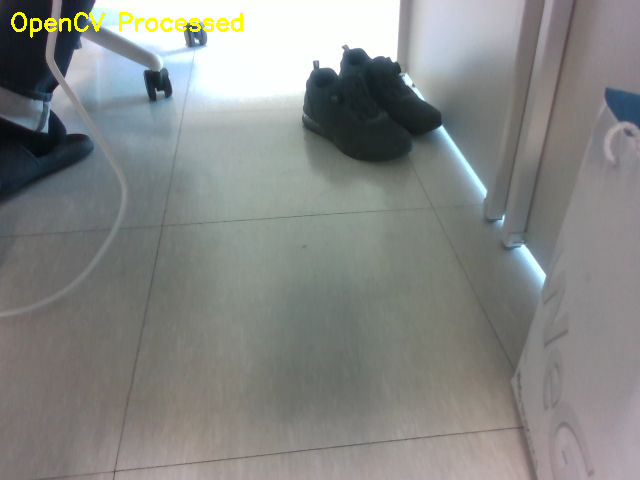

In [ ]:
rate = rospy.Rate(5)

while not rospy.is_shutdown():
    rate.sleep()

cv2.destroyAllWindows()
